In [2791]:
from pandas import Series
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot
import os
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
from numpy.lib.stride_tricks import as_strided
import scipy.stats as stats

#  ML
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import sklearn.model_selection as ms


In [2762]:
# test rolling windows

# overlapping function  
def windowed_view(arr, window, overlap): 
    arr = np.asarray(arr)
    window_step = window - overlap
    new_shape = arr.shape[:-1] + ((arr.shape[-1] - overlap) // window_step,
                                 window)
    new_strides = (arr.strides[:-1] + (window_step * arr.strides[-1],) +
                   arr.strides[-1:])
    return as_strided(arr, shape=new_shape, strides=new_strides)

# get processed date per channels per group funtion
def overlapData_pergroup_perChannels(groupIndex,channel,windowSize,overlap,dataFrameArr):
    # single channel
    signleGroup = dataFrameArr[groupIndex]
    c1Arr = signleGroup[channel].to_numpy()
    frame2Arr = c1Arr
    # print(frame2Arr)
    series_overlap = windowed_view(frame2Arr,windowSize,overlap) 
    print('The length of this data is ',len(series_overlap))
    return series_overlap



In [2763]:
# read data from csv 
def preProcess_ForEach_Participant(fileName):
    df = pd.read_csv(fileName)
    # group data
    groupData = df.groupby(['Label'])
    groupData.first()
    dataFrameArr = []
    for name,group in groupData:
        dataFrameArr.append(group)
    return dataFrameArr




In [2764]:
def get_features_each_channel(dataFrameArr,processedChannel,windowsize_group,overlapping):
    C1_2 = overlapData_pergroup_perChannels(1,processedChannel,windowsize_group,overlapping,dataFrameArr)
    C1_3 = overlapData_pergroup_perChannels(2,processedChannel,windowsize_group,overlapping,dataFrameArr)
    C1_4 = overlapData_pergroup_perChannels(3,processedChannel,windowsize_group,overlapping,dataFrameArr)
    C1_5 = overlapData_pergroup_perChannels(4,processedChannel,windowsize_group,overlapping,dataFrameArr)
    C1_6 = overlapData_pergroup_perChannels(5,processedChannel,windowsize_group,overlapping,dataFrameArr)
    C1_8 = overlapData_pergroup_perChannels(7,processedChannel,windowsize_group,overlapping,dataFrameArr)

    processed_Arr = []
    processed_Arr.append(C1_2)
    processed_Arr.append(C1_3)
    processed_Arr.append(C1_4)
    processed_Arr.append(C1_5)
    processed_Arr.append(C1_6)
    processed_Arr.append(C1_8)
    # print(len(processed_Arr))

    # mean
    mean_arr = []
    for data in processed_Arr:
        win_avg = np.mean(data,axis=-1)
        # print(len(win_avg))
        mean_arr.append(win_avg)

    # std
    # standard deviation
    std_arr = []
    for data in processed_Arr:
        win_std = np.std(data,axis=-1)
        # print(len(win_std))
        std_arr.append(win_std)

    # peak
    peak_arr = []
    for data in processed_Arr:
        win_max = np.max(data,axis=-1)
        # print(len(win_max))
        peak_arr.append(win_max)

    # AUC
    AUC_arr = []
    for data in processed_Arr:
        win_abc = np.abs(data)
        win_sum = np.sum(win_abc,axis=-1)
        # print(len(win_sum))
        AUC_arr.append(win_sum)

    # skewness
    skew_arr = []
    for data in processed_Arr:
        win_skew = stats.skew(data,axis=-1)
        # print(win_skew)
        skew_arr.append(win_skew)

    # Kurt
    kurt_arr = []
    for data in processed_Arr:
        win_kurt = stats.kurtosis(data,axis=-1)
        # print(win_skew)
        kurt_arr.append(win_kurt)

    # combination
    mean_com = np.concatenate([mean_arr[0],mean_arr[1],mean_arr[2],mean_arr[3],mean_arr[4],mean_arr[5]])
    std_com = np.concatenate([std_arr[0],std_arr[1],std_arr[2],std_arr[3],std_arr[4],std_arr[5]])
    peak_com = np.concatenate([peak_arr[0],peak_arr[1],peak_arr[2],peak_arr[3],peak_arr[4],peak_arr[5]])
    AUC_com = np.concatenate([AUC_arr[0],AUC_arr[1],AUC_arr[2],AUC_arr[3],AUC_arr[4],AUC_arr[5]])
    kurt_com = np.concatenate([kurt_arr[0],kurt_arr[1],kurt_arr[2],kurt_arr[3],kurt_arr[4],kurt_arr[5]])
    skew_com = np.concatenate([skew_arr[0],skew_arr[1],skew_arr[2],skew_arr[3],skew_arr[4],skew_arr[5]])
    Class_G2 = np.full(len(mean_arr[0]),2)
    Class_G3 = np.full(len(mean_arr[1]),3)
    Class_G4 = np.full(len(mean_arr[2]),4)
    Class_G5 = np.full(len(mean_arr[3]),5)
    Class_G7 = np.full(len(mean_arr[4]),7)
    Class_G8 = np.full(len(mean_arr[5]),8)
    class_allGroup = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

    Class_G2 = np.full(len(mean_arr[0]),1)
    Class_G3 = np.full(len(mean_arr[1]),1)
    Class_G4 = np.full(len(mean_arr[2]),2)
    Class_G5 = np.full(len(mean_arr[3]),2)
    Class_G7 = np.full(len(mean_arr[4]),1)
    Class_G8 = np.full(len(mean_arr[5]),1)
    class_allGroup2 = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

    Class_G2 = np.full(len(mean_arr[0]),1)
    Class_G3 = np.full(len(mean_arr[1]),1)
    Class_G4 = np.full(len(mean_arr[2]),2)
    Class_G5 = np.full(len(mean_arr[3]),2)
    Class_G7 = np.full(len(mean_arr[4]),3)
    Class_G8 = np.full(len(mean_arr[5]),3)
    class_allGroup3 = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

    Class_G2 = np.full(len(mean_arr[0]),1)
    Class_G3 = np.full(len(mean_arr[1]),2)
    Class_G4 = np.full(len(mean_arr[2]),2)
    Class_G5 = np.full(len(mean_arr[3]),3)
    Class_G7 = np.full(len(mean_arr[4]),3)
    Class_G8 = np.full(len(mean_arr[5]),4)
    class_allGroup4 = np.concatenate([Class_G2,Class_G3,Class_G4,Class_G5,Class_G7,Class_G8])

    # Normalization
    mean_com_z = stats.zscore(mean_com)
    std_com_z = stats.zscore(std_com)
    peak_com_z = stats.zscore(peak_com)
    AUC_com_z = stats.zscore(AUC_com)
    kurt_com_z = stats.zscore(kurt_com)
    skew_com_z = stats.zscore(skew_com)

    # convert to dataframe
    rawData = {'Group':class_allGroup, 'Mean':mean_com,'Std':std_com,'Peak':peak_com,'AUC':AUC_com,'Kurt':kurt_com,'Skew':skew_com}
    df_features = pd.DataFrame(rawData)
    df_features['Group2'] = class_allGroup2
    df_features['Group3'] = class_allGroup3
    df_features['Group4'] = class_allGroup4
    # print(df_features.head())
    # could but not output yet

    zData = {'Group':class_allGroup, 'Mean':mean_com_z,'Std':std_com_z,'Peak':peak_com_z,'AUC':AUC_com_z,'Kurt':kurt_com_z,'Skew':skew_com_z}
    df_features_z = pd.DataFrame(zData)
    df_features_z['Group2'] = class_allGroup2
    df_features_z['Group3'] = class_allGroup3
    df_features_z['Group4'] = class_allGroup4
    print(df_features_z)

    return df_features_z




In [2765]:
participant =13
fileName = './csv/p'+str(participant) +'.csv'
windowsize_group = 320 # 235 160 235 312
percentage = 0.9
overlapping = int(windowsize_group* percentage) #227 150 80 188 250
processedData = preProcess_ForEach_Participant(fileName)
print(overlapping)


288


In [2766]:
# get each channel for one participant

featuresAllChannels =[]
for index in range(1,19):
    print("index is ------------",index)
    processedChannel = 'C'+str(index)
    featureData_perChannel = get_features_each_channel(processedData,processedChannel,windowsize_group,overlapping)
    featuresAllChannels.append(featureData_perChannel)
   
print(len(featuresAllChannels))


 -0.161468   
237      8 -1.748801 -0.698980 -1.483471 -0.380533 -0.504294 -0.495488   
238      8 -1.405295 -0.486845 -1.321341 -0.348980 -0.700387 -0.729859   
239      8 -1.023997 -0.417621 -1.321341 -0.435697 -0.632395 -1.154870   
240      8 -0.196355 -0.903447 -1.149462 -0.947013 -0.791006 -1.278112   

     Group2  Group3  Group4  
0         1       1       1  
1         1       1       1  
2         1       1       1  
3         1       1       1  
4         1       1       1  
..      ...     ...     ...  
236       1       3       4  
237       1       3       4  
238       1       3       4  
239       1       3       4  
240       1       3       4  

[241 rows x 10 columns]
index is ------------ 6
The length of this data is  32
The length of this data is  36
The length of this data is  53
The length of this data is  46
The length of this data is  30
The length of this data is  44
     Group      Mean       Std      Peak       AUC      Kurt      Skew  \
0        2 -3.125948

In [2767]:
# c3 c8 c1 LF, #c12 c11 c17 Rf
C3 = featuresAllChannels[3]
C3R = C3.rename(columns={"Group":"Group6", "Mean":"Mean3","Std":"Std3","Peak":"Peak3","AUC":"AUC3","Kurt":"Kurt3", "Skew":"Skew3"})
# print(C3R)
C8 = featuresAllChannels[8]
C8R = C8.rename(columns={"Group":"Group6", "Mean":"Mean8","Std":"Std8","Peak":"Peak8","AUC":"AUC8","Kurt":"Kurt8", "Skew":"Skew8"})
C8RS = C8R.drop(['Group6', 'Group4','Group3','Group2'], axis=1)
# print(C8R)
# print(C8RS)

C1 = featuresAllChannels[1]
C1R = C1.rename(columns={"Group":"Group6", "Mean":"Mean1","Std":"Std1","Peak":"Peak1","AUC":"AUC1","Kurt":"Kurt1", "Skew":"Skew1"})
C1RS = C1R.drop(['Group6', 'Group4','Group3','Group2'], axis=1)
# print(C1R)
# print(C1RS)
# print(C1R)
CLF = pd.concat([C8RS,C1RS,C3R],axis=1, )
# print(CLF)

# dividerLF = 3
# if C3R['Mean3'].isnull().values.any():
#     dividerLF = dividerLF-1
# if C8R['Mean8'].isnull().values.any():
#     dividerLF = dividerLF-1
# if C1R['Mean1'].isnull().values.any():
#     dividerLF = dividerLF-1

CLF["Mean_R"] = CLF[['Mean1','Mean3','Mean8']].mean(axis=1) 
CLF["Std_R"] = CLF[['Std1','Std3','Std8']].mean(axis=1) 
CLF["Peak_R"] = CLF[['Peak1','Peak3','Peak8']].mean(axis=1) 
CLF["AUC_R"] = CLF[['AUC1','AUC3','AUC8']].mean(axis=1) 
CLF["Kurt_R"] = CLF[['Kurt1','Kurt3','Kurt8']].mean(axis=1) 
CLF["Skew_R"] = CLF[['Skew1','Skew3','Skew8']].mean(axis=1) 
# print(dividerLF)
# print(CLF)

# LF = 
# CLF = 

C12 = featuresAllChannels[12]
C12R = C12.rename(columns={"Group":"Group6", "Mean":"Mean12","Std":"Std12","Peak":"Peak12","AUC":"AUC12","Kurt":"Kurt12", "Skew":"Skew12"})
# print(C12R)
C11 = featuresAllChannels[11]
C11R = C11.rename(columns={"Group":"Group6", "Mean":"Mean11","Std":"Std11","Peak":"Peak11","AUC":"AUC11","Kurt":"Kurt11", "Skew":"Skew11"})
C11RS = C11R.drop(['Group6', 'Group4','Group3','Group2'], axis=1)
# print(C11R)
C17 = featuresAllChannels[17]
C17R = C17.rename(columns={"Group":"Group6", "Mean":"Mean17","Std":"Std17","Peak":"Peak17","AUC":"AUC17","Kurt":"Kurt17", "Skew":"Skew17"})
C17RS = C17R.drop(['Group6', 'Group4','Group3','Group2'], axis=1)

CRF = pd.concat([C11RS,C17RS,C12R],axis=1, )
# print(CRF)

# dividerRF = 3
# if C12R['Mean12'].isnull().values.any():
#     dividerRF = dividerRF-1
# if C11R['Mean11'].isnull().values.any():
#     dividerRF = dividerRF-1
# if C17R['Mean17'].isnull().values.any():
#     dividerRF = dividerRF-1

# print(dividerRF)

CRF["Mean_R"] = CRF[['Mean11','Mean17','Mean12']].mean(axis=1) 
CRF["Std_R"] = CRF[['Std11','Std17','Std12']].mean(axis=1) 
CRF["Peak_R"] = CRF[['Peak11','Peak17','Peak12']].mean(axis=1) 
CRF["AUC_R"] = CRF[['AUC11','AUC17','AUC12']].mean(axis=1) 
CRF["Kurt_R"] = CRF[['Kurt11','Kurt17','Kurt12']].mean(axis=1) 
CRF["Skew_R"] = CRF[['Skew11','Skew17','Skew12']].mean(axis=1) 

# print(CRF)




In [2768]:
# features to cvs
fr= './results/fr/'+str(participant)+'.csv'
fl= './results/fl/'+str(participant)+'.csv'
CRF.to_csv(fr,header = True)
CLF.to_csv(fl,header = True)

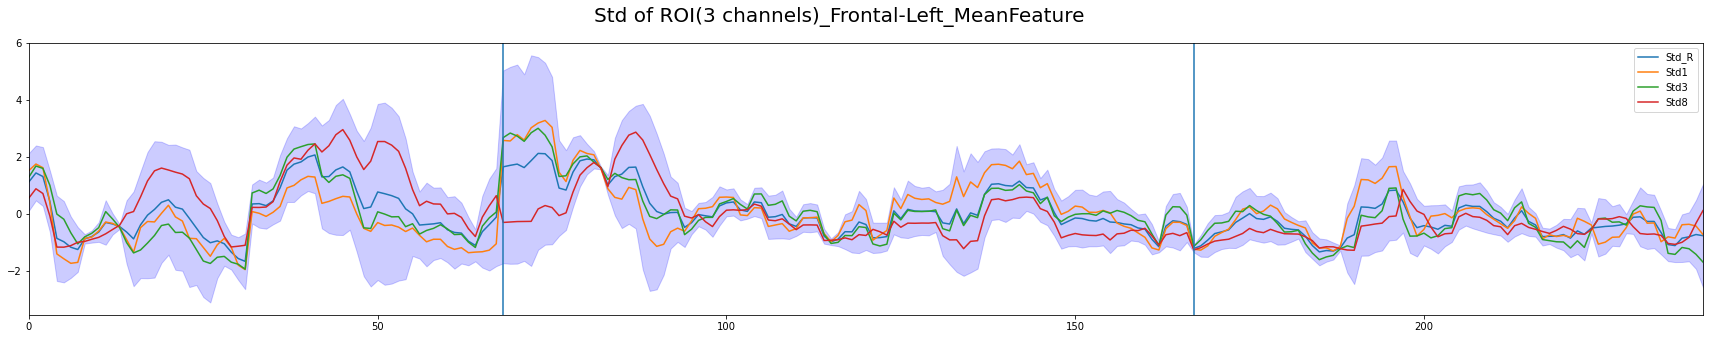

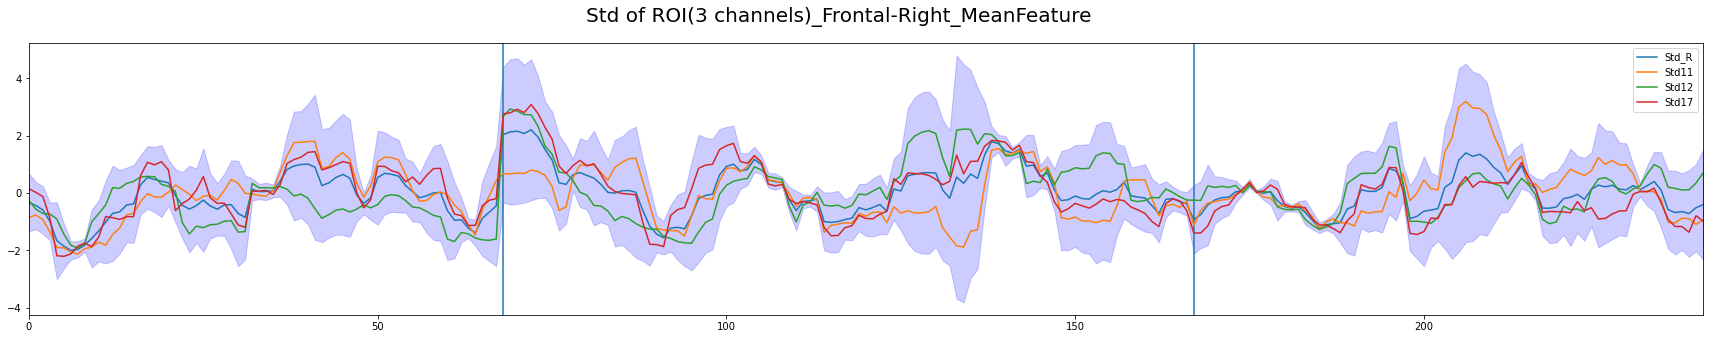

In [2769]:
feature = 'Std'
region = feature+"_R"
f1 = feature+"1"
f3 = feature+"3"
f8 = feature+"8"
f11 = feature+"11"
f17 = feature+"17"
f12 = feature+"12"
# figure 
# standardize the figure
fig =plt.figure(figsize=(30,5))
X_max = len(CLF[region])
plt.xlim(0,X_max)
title = feature +" of ROI(3 channels)_Frontal-Left_MeanFeature"
fig.suptitle(title,fontsize = 20)
std = CLF[[f1,f3,f8]].std(axis=1) 
ma = CLF[region]
# plt.xlabel('Frame (7.8125/s)', fontsize=18)
CLF[region].plot()
CLF[f1].plot()
CLF[f3].plot()
CLF[f8].plot()
plt.fill_between(std.index, ma-2*std, ma+2*std, color='b', alpha=0.2)

# plot group segmentations

x1 = (CLF['Group3']==1).sum()
x2 = x1+(CLF['Group3']==2).sum()
x3 = x2 + (CLF['Group3']==3).sum()
plt.axvline(x=x1)
plt.axvline(x=x2)

# groupIndex = grouped_Label['Group'].idxmax() 
# for xc in groupIndex:
#     plt.axvline(x=xc)
# plt.legend()
# plt.axvline(x=Yline[0])

plt.legend()

# right
fig =plt.figure(figsize=(30,5))
X_max = len(CRF[region])
plt.xlim(0,X_max)
title = feature + " of ROI(3 channels)_Frontal-Right_MeanFeature"
fig.suptitle(title,fontsize = 20)
std = CRF[[f11,f17,f12]].std(axis=1) 
ma = CRF[region]
# plt.xlabel('Frame (7.8125/s)', fontsize=18)
plt.axvline(x=x1)
plt.axvline(x=x2)

CRF[region].plot()
CRF[f11].plot()
CRF[f12].plot()
CRF[f17].plot()
plt.fill_between(std.index, ma-2*std, ma+2*std, color='b', alpha=0.2)
plt.legend()


In [2770]:
# feature plot 
df_pair = CRF[['Mean_R','Std_R','Peak_R','AUC_R','Kurt_R','Skew_R','Group3']]
# df['species'] = np.array([CRF.target_names[i] for i in iris.target])
# sns.pairplot(df_pair, hue='Group3')

In [2771]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [2772]:
def ML_plot(df_features_z,regionName,k):
    kf =KFold(n_splits = k, shuffle= True, random_state=2)
    train_arr =[]
    test_arr = []
    g_6 = []
    g_3 = [] # 2-3,4-5,7-8
    g_2 = [] # 2 3 4, 5 7 8
    g_4 = []

    g_6_svm = []
    g_3_svm = []
    g_2_svm = []
    g_4_svm = []

    g_6_knn = []
    g_3_knn = []
    g_2_knn = []
    g_4_knn = []
    for train_index,test_index in kf.split(df_features_z):
        train = df_features_z.iloc[train_index]
        test = df_features_z.iloc[test_index]
        # print(train)
        # print(test)
        # train_arr.append(train)
        # test_arr.append(test)
        x_train = train[['Mean_R','Std_R','Peak_R','AUC_R','Kurt_R','Skew_R']]
        y_train3 = train['Group3']
        y_train2 = train['Group3']
        y_train6 = train['Group3']
        y_train4 = train['Group3']
        x_test = test[['Mean_R','Std_R','Peak_R','AUC_R','Kurt_R','Skew_R']]
        y_test3 = test['Group3']
        y_test2 = test['Group3']
        y_test6 = test['Group3']
        y_test4 = test['Group3']
# lda / random
        # clf =LinearDiscriminantAnalysis() 
        clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

        clf.fit(x_train,y_train6)
        score_mean = clf.score(x_test,y_test6)
        g_6.append(score_mean)

        clf.fit(x_train,y_train3)
        score_mean = clf.score(x_test,y_test3)
        g_3.append(score_mean)

        # # confusion matrix
        # predicted = clf.predict(x_test)
        # cm = pd.DataFrame(confusion_matrix(y_test3, predicted), columns=['L1','L2','L3'], index=['L1','L2','L3'])
        # fig =plt.figure()
        # sns.heatmap(cm, annot=True,square=True)

        # # confusion matrix
        # predicted = clf.predict(x_test)
        # cm = pd.DataFrame(confusion_matrix(y_test3, predicted), columns=['L1','L2'], index=['L1','L2'])
        # fig =plt.figure()
        # stats_text = "\n\nAccuracy={:0.3f}".format(score_mean)
        # sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues',square=True)
        # plt.ylabel('True label')
        # plt.xlabel('Predicted label' + stats_text)
        # #

        feature_names =['Mean_R','Std_R','Peak_R','AUC_R','Kurt_R','Skew_R']
        feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
        fig =plt.figure()
        sns.barplot(x=feature_imp, y=feature_imp.index)
        # Add labels to your graph
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()


        clf.fit(x_train,y_train2)
        score_mean = clf.score(x_test,y_test2)
        g_2.append(score_mean)

        clf.fit(x_train,y_train4)
        score_mean = clf.score(x_test,y_test4)
        g_4.append(score_mean)

    # svm
        clf_svm =svm.SVC(gamma=2, C=1)

        clf_svm.fit(x_train,y_train6)
        score_mean = clf_svm.score(x_test,y_test6)
        g_6_svm.append(score_mean)
        # # confusion matrix
        # predicted = clf_svm.predict(x_test)
        # cm = pd.DataFrame(confusion_matrix(y_test6, predicted), columns=['L1','L2','L3','L4','L5','L6'], index=['L1','L2','L3','L4','L5','L6'])
        # fig =plt.figure()
        # sns.heatmap(cm, annot=True,square=True)
        # # accuracy = accuracy_score(y_test3,pre)

        clf_svm.fit(x_train,y_train3)
        score_mean = clf_svm.score(x_test,y_test3)
        g_3_svm.append(score_mean)

        # # confusion matrix
        # predicted = clf_svm.predict(x_test)
        # cm = pd.DataFrame(confusion_matrix(y_test3, predicted), columns=['L1','L2'], index=['L1','L2'])
        # fig =plt.figure()
        # stats_text = "\n\nAccuracy={:0.3f}".format(score_mean)
        # sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues',square=True)
        # plt.ylabel('True label')
        # plt.xlabel('Predicted label' + stats_text)
        # #


        # plot importance
        # featuyres_names =['Mean','Std','Peak','AUC','Kurt','Skew']
        # f_importances(clf_svm)
        
        # # confusion matrix
        # predicted = clf_svm.predict(x_test)
        # cm = pd.DataFrame(confusion_matrix(y_test3, predicted), columns=['L1','L2','L3'], index=['L1','L2','L3'])
        # fig =plt.figure()
        # sns.heatmap(cm, annot=True,square=True)




        clf_svm.fit(x_train,y_train2)
        score_mean = clf_svm.score(x_test,y_test2)
        g_2_svm.append(score_mean)

        clf_svm.fit(x_train,y_train4)
        score_mean = clf_svm.score(x_test,y_test4)
        g_4_svm.append(score_mean)

        # # confusion matrix
        # predicted = clf_svm.predict(x_test)
        # cm = pd.DataFrame(confusion_matrix(y_test4, predicted), columns=['L1','L2','L3','L4'], index=['L1','L2','L3','L4'])
        # fig =plt.figure()
        # sns.heatmap(cm, annot=True,square=True)
        # accuracy = accuracy_score(y_test3,pre)



    # knn
        clf_knn =KNeighborsClassifier()

        clf_knn.fit(x_train,y_train6)
        score_mean = clf_knn.score(x_test,y_test6)
        g_6_knn.append(score_mean)

        clf_knn.fit(x_train,y_train3)
        score_mean = clf_knn.score(x_test,y_test3)
        g_3_knn.append(score_mean)

        clf_knn.fit(x_train,y_train2)
        score_mean = clf_knn.score(x_test,y_test2)
        g_2_knn.append(score_mean)

        clf_knn.fit(x_train,y_train4)
        score_mean = clf_knn.score(x_test,y_test4)
        g_4_knn.append(score_mean)

    # result = next(kf.split(df_features_z), None)
    # print(result)

    # train = df_features_z.iloc[result[0]]
    # test = df_features_z.iloc[result[1]]


    # set width of bar
    barWidth = 0.15
    
    # Set position of bar on X axis
    r1 = np.arange(len(g_2))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    # print(train)
    # print(test)
    # Labels =[1,2,3,4,5]
    # fig =plt.figure(figsize=(5,5))
    # plt.axhline(y=0.58, color='r', linestyle='--')
    # plt.bar(r1,g_2, width=barWidth,label="2 Groups")
    # plt.bar(r2,g_3, width=barWidth,label="3 Groups")
    # plt.bar(r3,g_4, width=barWidth,label="4 Groups")
    # plt.bar(r4,g_6, width=barWidth,label="6 Groups")
    # plt.legend(numpoints=1)
    # title = " Classification Performance of Channel_"+targetC
    # fig.suptitle(title,fontsize = 20)
    # plt.xlabel('Corss Validation Training Instances', fontsize=18)

    fig =plt.figure(figsize=(8,8))
    plt.axhline(y=0.58, color='r', linestyle='--')
    # plt.plot(g_2, label="2 Groups_RA")
    plt.plot(g_3, label="2 Groups_RA")
    # plt.plot(g_4,label="4 Groups_RA")
    # plt.plot(g_6, label="6 Groups_RA")
    # plt.plot(g_2_svm, label="2 Groups_SVM")
    plt.plot(g_3_svm, label="2 Groups_SVM")
    # plt.plot(g_4_svm,label="4 Groups_SVM")
    # plt.plot(g_6_svm, label="6 Groups_SVM")
    # plt.plot(g_2_knn, label="2 Groups_KNN")
    plt.plot(g_3_knn, label="2 Groups_KNN")
    # plt.plot(g_4_knn,label="4 Groups_KNN")
    # plt.plot(g_6_knn, label="6 Groups_KNN")
    plt.legend(numpoints=1)
    title = " Classification Performance of "+regionName+"Region"
    fig.suptitle(title,fontsize = 20)
    plt.xlabel('Corss Validation Training Instances', fontsize=18)
    
    r_LDA = 0
    r_KNN =0
    r_SVM = 0
    s1 = 0
    s2 =0
    s3 =0
    s = len(g_3_knn)
    for i in range(0,len(g_3_svm)):
        # print(s1)
        s1 = s1+ g_3_svm[i]
        s2 = s2 + g_3_knn[i]
        s3 = s3 +g_3[i]
    r_KNN = s2/s
    r_LDA = s3/s
    r_SVM = s1/s
    return r_SVM,r_KNN,r_LDA


In [2798]:
clf = svm.SVC(gamma=2, C=1)
# clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

X = CLF[['Mean_R','Std_R','Peak_R','AUC_R','Kurt_R','Skew_R']]
y = CLF['Group3']
scores = cross_val_score(clf, X, y, cv = ms.KFold(shuffle = True))
print("Shuffle = True",scores)

# clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

X = CLF[['Mean_R','Std_R','Peak_R','AUC_R','Kurt_R','Skew_R']]
y = CLF['Group3']
scores = cross_val_score(clf, X, y, cv = 5)
print("Shuffle = False",scores)

Shuffle = True [0.87755102 0.875      0.8125     0.75       0.8125    ]
Shuffle = False [0.20408163 0.5625     0.20833333 0.625      0.39583333]


No handles with labels found to put in legend.
        Mean8      Std8     Peak8      AUC8     Kurt8     Skew8     Mean1  \
0   -1.968667  0.561432 -1.249778  0.342966 -0.591075 -1.331410 -2.925078   
1   -1.364733  0.883455 -0.438988  0.461843 -0.496115 -1.241009 -1.941587   
2   -0.695543  0.716475 -0.438988  0.126196  0.656028 -1.951754 -0.995072   
3    0.273782 -0.071727 -0.438988 -0.412929  4.570391 -2.917471  0.509762   
4    1.023845 -1.164787 -0.438988 -0.810932 -0.023561  0.528158  1.775925   
..        ...       ...       ...       ...       ...       ...       ...   
236  0.241846 -1.069010 -1.031721 -0.994314 -0.832635  0.072792 -1.576380   
237  0.759302 -0.996523 -0.354067 -0.842446 -0.269175  0.487004 -0.913670   
238  0.564919 -0.823442 -0.354067 -0.777592  0.296232 -0.100252 -0.870492   
239 -0.038781 -0.326668 -0.354067 -0.494434  0.226932 -0.821187 -0.463289   
240 -0.422813  0.115810 -0.354067 -0.132069 -0.458590 -0.977713 -0.182356   

         Std1     Peak1     

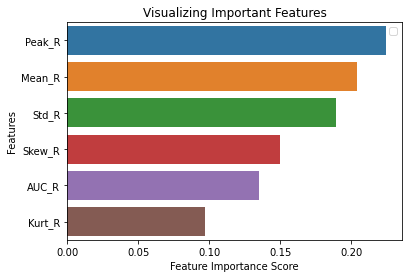

No handles with labels found to put in legend.


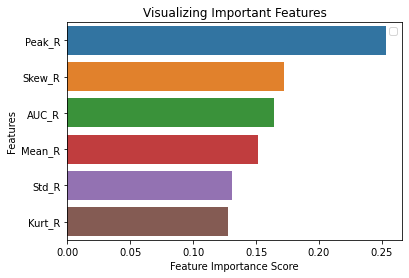

No handles with labels found to put in legend.


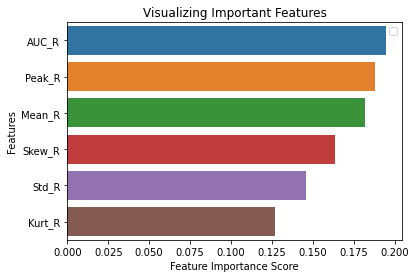

No handles with labels found to put in legend.


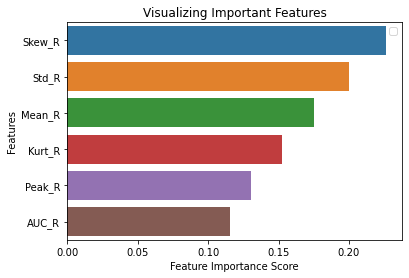

No handles with labels found to put in legend.


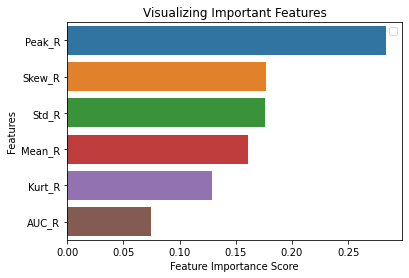

No handles with labels found to put in legend.


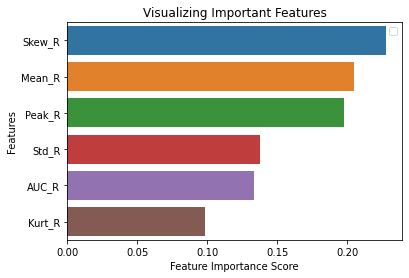

No handles with labels found to put in legend.


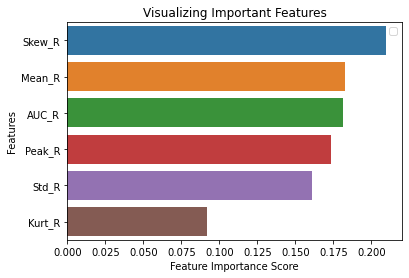

No handles with labels found to put in legend.


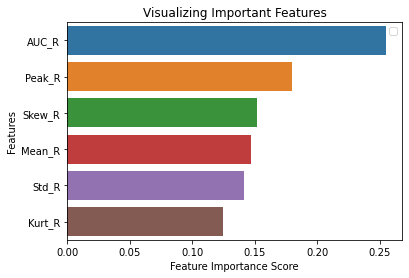

No handles with labels found to put in legend.


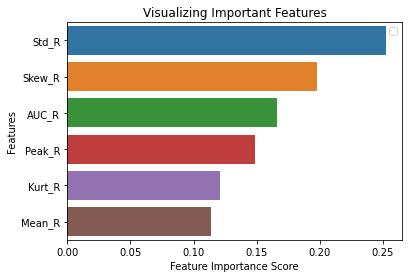

No handles with labels found to put in legend.


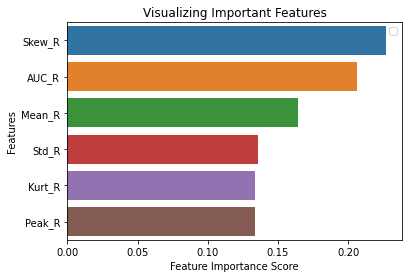

0.8295 0.7346666666666668 0.6681666666666667


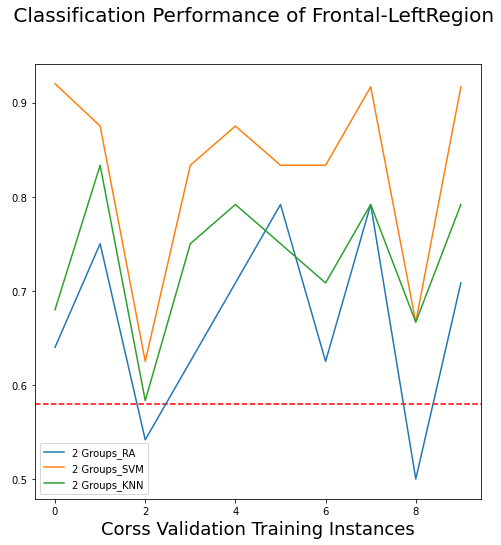

In [2774]:
data_select_1_2 = CLF[CLF['Group3'].isin([1,2,3])]
print(data_select_1_2)
CLF_result_SVM,CLF_result_KNN,CLF_result_LDA = ML_plot(data_select_1_2,'Frontal-Left',10)
print(CLF_result_SVM,CLF_result_KNN,CLF_result_LDA)

No handles with labels found to put in legend.


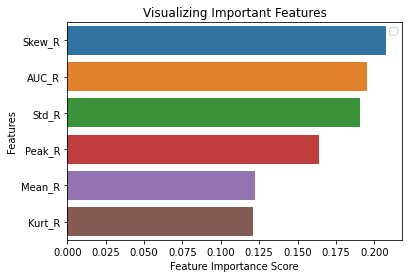

No handles with labels found to put in legend.


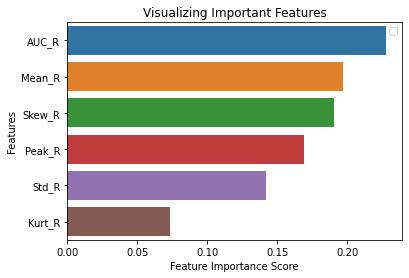

No handles with labels found to put in legend.


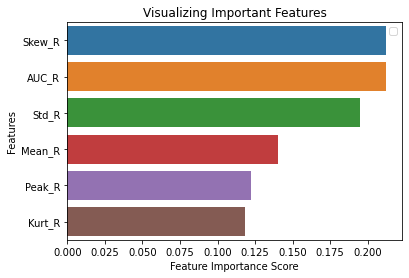

No handles with labels found to put in legend.


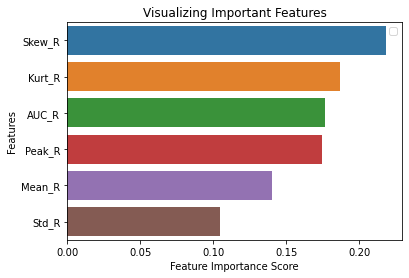

No handles with labels found to put in legend.


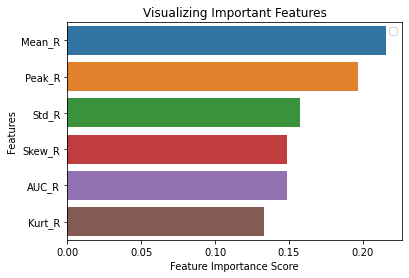

No handles with labels found to put in legend.


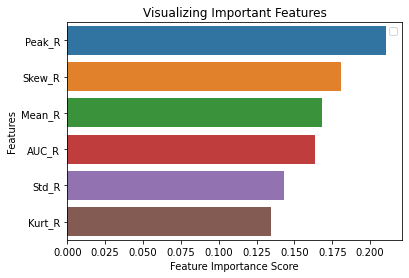

No handles with labels found to put in legend.


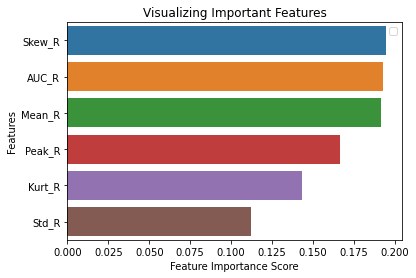

No handles with labels found to put in legend.


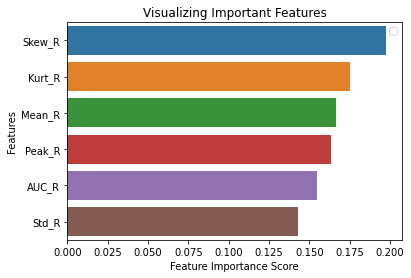

No handles with labels found to put in legend.


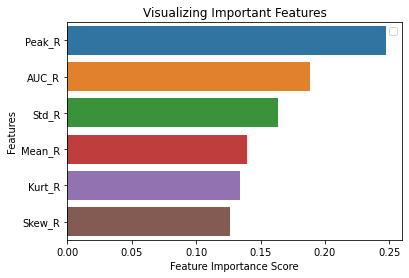

No handles with labels found to put in legend.


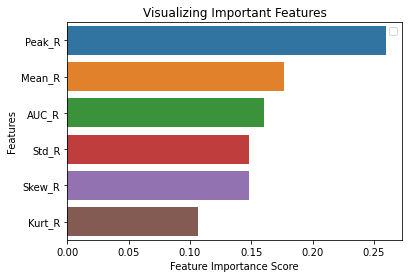

0.8295 0.7346666666666668 0.6525


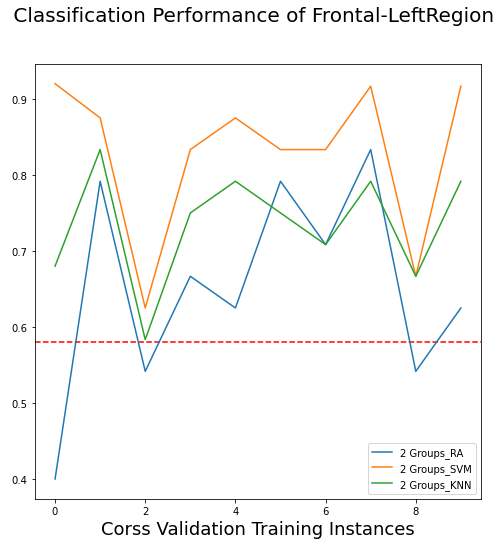

In [2775]:
# cross validation 
# time series split  dose the past affect the future?
df_features_z = CLF
CLF_result_SVM,CLF_result_KNN,CLF_result_LDA = ML_plot(CLF,'Frontal-Left',10)
print(CLF_result_SVM,CLF_result_KNN,CLF_result_LDA)


No handles with labels found to put in legend.


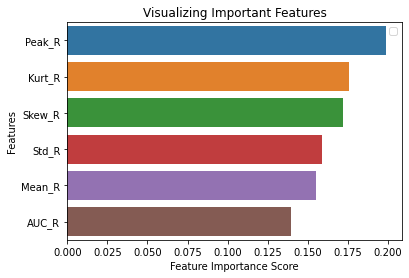

No handles with labels found to put in legend.


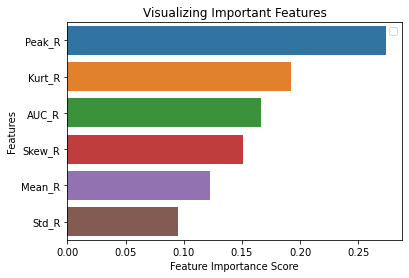

No handles with labels found to put in legend.


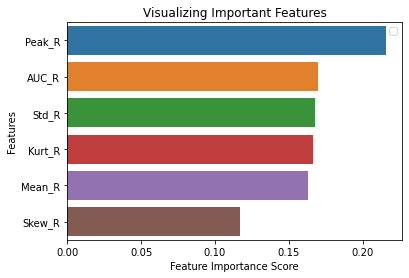

No handles with labels found to put in legend.


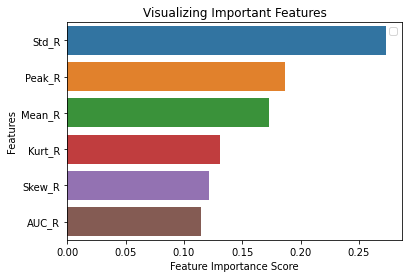

No handles with labels found to put in legend.


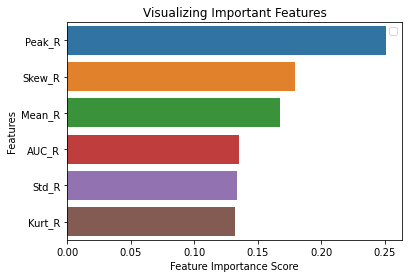

No handles with labels found to put in legend.


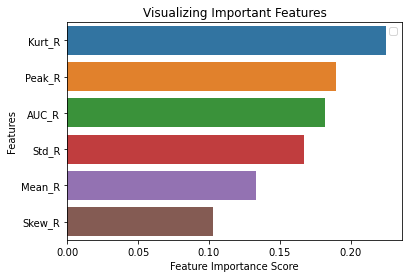

No handles with labels found to put in legend.


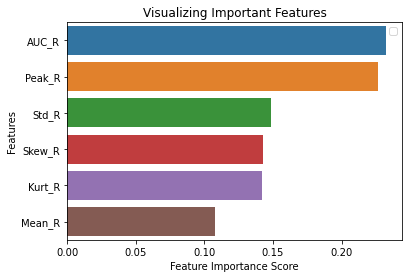

No handles with labels found to put in legend.


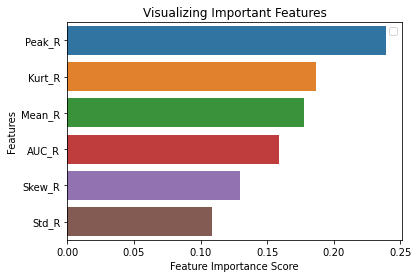

No handles with labels found to put in legend.


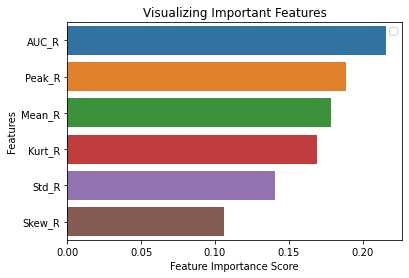

No handles with labels found to put in legend.


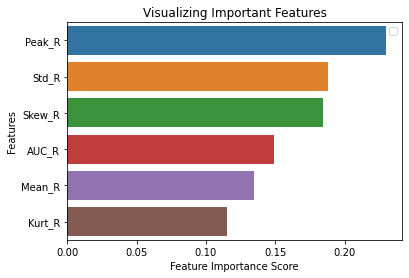

0.8130000000000001 0.7465 0.6308333333333334


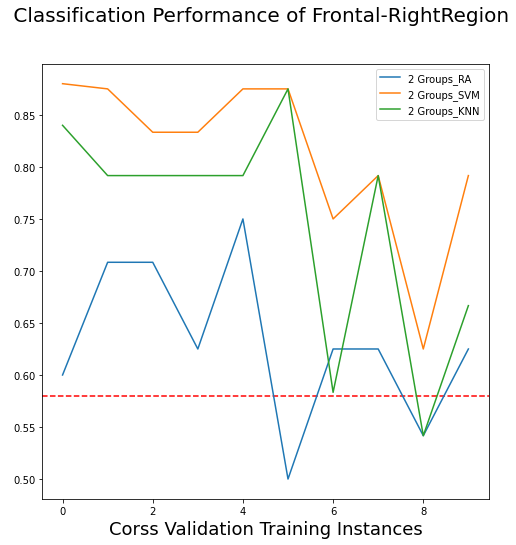

In [2776]:
CRF_result_SVM,CRF_result_KNN,CRF_result_LDA = ML_plot(CRF,'Frontal-Right',10)
print(CRF_result_SVM,CRF_result_KNN,CRF_result_LDA)

In [2777]:
# show all results 
df = pd.read_csv("./results/results_personal.csv")
print(df)
fig =plt.figure(figsize=(14,6))
df['SVM_L'].plot()
df['KNN_L'].plot()
df['LDA_L'].plot()
plt.xlabel('Participants', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.axhline(y=0.58, color='r', linestyle='--')
plt.legend()

fig =plt.figure(figsize=(14,6))
df['SVM_R'].plot()
df['KNN_R'].plot()
df['LDA_R'].plot()
plt.xlabel('Participants', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.axhline(y=0.58, color='r', linestyle='--')
plt.legend()

Participant   SVM_L   KNN_L                LDA_L                 SVM_R  \
0           1.0  89.30%  65.09%  0.569078947368421\n                95.07%   
1           2.0  94.10%  60.18%               56.93%                90.66%   
2           3.0  83.45%  61.79%               53.51%                96.82%   
3           4.0  89.30%  65.09%               56.91%                95.07%   
4           5.0  93.90%  63.51%               47.94%                87.69%   
5           6.0  83.85%  56.39%               56.18%                91.72%   
6           7.0  88.79%  65.50%               65.21%                87.23%   
7           8.0  90.16%  56.62%               56.62%                89.84%   
8           9.0  92.63%  53.80%               52.80%                90.75%   
9          10.0  85.59%  64.40%               54.23%  \n0.8662318535661686   
10         11.0  96.30%  57.91%               44.67%                92.93%   
11         12.0  79.98%  66.99%               51.78%                

TypeError: no numeric data to plot